- Dataset
https://www.zillow.com/research/data/

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request

<ipython-input-2-37777429a894>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [7]:
home_prices = pd.read_csv(DATA_DIR / 'rent' / "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

In [12]:
home_prices[:4]

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,102001,0,United States,Country,NaN,127202.0,127546.0,127908.0,128645.0,129389.0,...,271623.0,274979.0,278635.0,282495.0,287202.0,292730.0,298613.0,304008.0,308632.0,312728.0
1,394913,1,"New York, NY",Msa,NY,224341.0,225681.0,226887.0,229261.0,231472.0,...,516687.0,521426.0,525792.0,530533.0,536044.0,543211.0,551142.0,558738.0,564641.0,569191.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231193.0,231998.0,233231.0,235576.0,238089.0,...,741209.0,748698.0,756569.0,767615.0,783282.0,803090.0,823992.0,837437.0,846549.0,851308.0
3,394463,3,"Chicago, IL",Msa,IL,170104.0,170505.0,171024.0,172064.0,173166.0,...,258211.0,260534.0,262648.0,265690.0,268442.0,272263.0,276430.0,280547.0,283620.0,286280.0


In [8]:
rent_prices = pd.read_csv(DATA_DIR / 'rent' / "Metro_ZORI_AllHomesPlusMultifamily_SSA.csv")

In [27]:
rent_prices[:4]

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10
0,102001,United States,0,1347.0,1352,1358.0,1364,1369,1375,1380,...,1727,1744,1761,1777,1795.0,1813,1830,1849,1867.0,1886.0
1,394913,"New York, NY",1,2356.0,2366,2376.0,2387,2397,2408,2418,...,2592,2608,2624,2640,2658.0,2676,2694,2715,2736.0,2757.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,1719.0,1730,1740.0,1750,1761,1771,1782,...,2347,2366,2384,2402,2421.0,2440,2459,2480,2500.0,2521.0
3,394463,"Chicago, IL",3,1374.0,1378,1381.0,1385,1388,1392,1395,...,1583,1591,1599,1607,1615.0,1624,1633,1642,1652.0,1661.0


In [31]:
home_prices[np.array([True if "Pittsburgh" in i else False for i in home_prices.RegionName.values])]

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
22,394982,22,"Pittsburgh, PA",Msa,PA,88409.0,88636.0,88848.0,89222.0,89650.0,...,179851.0,NaN,182937.0,184771.0,189064.0,193188.0,196561.0,198310.0,199279.0,200185.0


In [35]:
region_ids = np.array(["102001", "395056", "395057", "394404", "394463", "394913", "394982"]).astype(int)

In [36]:
region_rents = rent_prices[rent_prices.RegionID.isin(region_ids)]
region_rents

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10
0,102001,United States,0,1347.0,1352,1358.0,1364,1369,1375,1380,...,1727,1744,1761,1777,1795.0,1813,1830,1849,1867.0,1886.0
1,394913,"New York, NY",1,2356.0,2366,2376.0,2387,2397,2408,2418,...,2592,2608,2624,2640,2658.0,2676,2694,2715,2736.0,2757.0
3,394463,"Chicago, IL",3,1374.0,1378,1381.0,1385,1388,1392,1395,...,1583,1591,1599,1607,1615.0,1624,1633,1642,1652.0,1661.0
10,394404,"Boston, MA",10,2072.0,2078,2084.0,2089,2095,2100,2106,...,2430,2444,2459,2473,2490.0,2506,2522,2540,2558.0,2576.0
11,395057,"San Francisco, CA",11,2101.0,2133,2166.0,2198,2230,2262,2293,...,2856,2867,2878,2890,2903.0,2916,2929,2945,2961.0,2977.0
17,395056,"San Diego, CA",17,1683.0,1692,1701.0,1710,1720,1729,1738,...,2369,2396,2423,2449,2477.0,2504,2532,2561,2589.0,2618.0
22,394982,"Pittsburgh, PA",22,994.0,999,1004.0,1009,1013,1018,1023,...,1200,1206,1213,1220,1227.0,1235,1242,1249,1256.0,1264.0


In [39]:
region_home_prices = home_prices[home_prices.RegionID.isin(region_ids)]
region_home_prices

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,102001,0,United States,Country,NaN,127202.0,127546.0,127908.0,128645.0,129389.0,...,271623.0,274979.0,278635.0,282495.0,287202.0,292730.0,298613.0,304008.0,308632.0,312728.0
1,394913,1,"New York, NY",Msa,NY,224341.0,225681.0,226887.0,229261.0,231472.0,...,516687.0,521426.0,525792.0,530533.0,536044.0,543211.0,551142.0,558738.0,564641.0,569191.0
3,394463,3,"Chicago, IL",Msa,IL,170104.0,170505.0,171024.0,172064.0,173166.0,...,258211.0,260534.0,262648.0,265690.0,268442.0,272263.0,276430.0,280547.0,283620.0,286280.0
10,394404,10,"Boston, MA",Msa,MA,232389.0,233686.0,234944.0,237152.0,239348.0,...,543018.0,549196.0,554449.0,560571.0,567813.0,577816.0,587711.0,595652.0,600658.0,605224.0
11,395057,11,"San Francisco, CA",Msa,CA,355055.0,356954.0,359602.0,366837.0,375968.0,...,1170305.0,1179583.0,1194732.0,1215387.0,1243702.0,1276449.0,1309799.0,1330429.0,1342569.0,1346995.0
17,395056,17,"San Diego, CA",Msa,CA,227696.0,228935.0,230277.0,233271.0,236141.0,...,683301.0,691692.0,701945.0,716004.0,737036.0,761260.0,785146.0,799810.0,809545.0,814289.0
22,394982,22,"Pittsburgh, PA",Msa,PA,88409.0,88636.0,88848.0,89222.0,89650.0,...,179851.0,NaN,182937.0,184771.0,189064.0,193188.0,196561.0,198310.0,199279.0,200185.0


In [41]:
region_home_prices.columns[5:]

Index(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31',
       ...
       '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
       '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31'],
      dtype='object', length=262)

In [62]:
region_home_prices_df = region_home_prices.melt(
    value_vars=region_home_prices.columns[5:],
    id_vars="RegionName",
    value_name="home_price",
    var_name="date",
)
region_home_prices_df["date"] = pd.to_datetime(region_home_prices_df.date)
region_home_prices_df_US_AVG = region_home_prices_df[
    region_home_prices_df.RegionName == "United States"
]
region_home_prices_df = region_home_prices_df[
    region_home_prices_df.RegionName != "United States"
]
region_home_prices_df = region_home_prices_df.merge(
    region_home_prices_df_US_AVG, on=["date"], suffixes=("", "_US")
)
region_home_prices_df

,RegionName,date,home_price,RegionName_US,home_price_US
0,"New York, NY",2000-01-31,224341.0,United States,127202.0
1,"Chicago, IL",2000-01-31,170104.0,United States,127202.0
2,"Boston, MA",2000-01-31,232389.0,United States,127202.0
3,"San Francisco, CA",2000-01-31,355055.0,United States,127202.0
4,"San Diego, CA",2000-01-31,227696.0,United States,127202.0
...,...,...,...,...,...
1567,"Chicago, IL",2021-10-31,286280.0,United States,312728.0
1568,"Boston, MA",2021-10-31,605224.0,United States,312728.0
1569,"San Francisco, CA",2021-10-31,1346995.0,United States,312728.0
1570,"San Diego, CA",2021-10-31,814289.0,United States,312728.0


In [65]:
region_home_prices_df["home_price_scaled"] = region_home_prices_df["home_price"] / region_home_prices_df["home_price_US"]

In [63]:
import seaborn as sns

In [68]:
from datetime import date

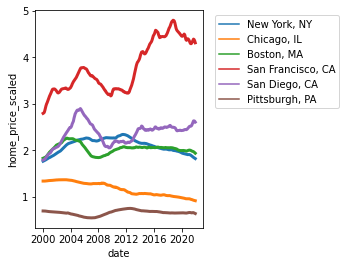

In [73]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.lineplot(
    data=region_home_prices_df, x="date", y="home_price_scaled", hue="RegionName", ax=ax,
    lw=3
)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
#ax.set_xlim([date(year=1984, month=1, day=1), date(year=2020, month=1, day=1)])

In [ ]:
rent_prices

In [18]:
home_prices.RegionID

0      102001
1      394913
2      753899
3      394463
4      394514
        ...  
903    394767
904    753874
905    394968
906    395188
907    394743
Name: RegionID, Length: 908, dtype: int64

In [19]:
home_prices[home_prices.RegionID.isin(region_ids)]

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
